<a href="https://colab.research.google.com/github/M20Jay/Custom_Repo/blob/main/ML_Insurance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Core data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [4]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [5]:
# Model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score, median_absolute_error

In [6]:
# Statistical analysis
from scipy.stats import normaltest, shapiro, jarque_bera
from scipy.stats import pearsonr, spearmanr, kendalltau

In [7]:
print("🏥 INSURANCE PREMIUM PREDICTION ANALYSIS")
print("=" * 60)
print("Academic Project: Advanced Regression Modeling")
print("Objective: Predict insurance premiums using customer demographics")
print("=" * 60)


🏥 INSURANCE PREMIUM PREDICTION ANALYSIS
Academic Project: Advanced Regression Modeling
Objective: Predict insurance premiums using customer demographics


In [13]:
data_path = "/content/drive/MyDrive/Python Dataset/Datasets/ML_Insurance _Data_Analysis.xls"
df = pd.read_excel(data_path)

In [31]:
#Comprehensive data structure analysis

print("\n📊 DATA STRUCTURE EXAMINATION")
print("-" * 40)

# Basic information
print(f"\nData Completeness:")
for col in df.columns:
  non_null = df[col].count()
  total = len(df)
  completeness = (non_null / total) * 100
  print(f"  {col}: {completeness:.1f}% complete ({non_null}/{total})")


📊 DATA STRUCTURE EXAMINATION
----------------------------------------

Data Completeness:
  age: 100.0% complete (1338/1338)
  sex: 100.0% complete (1338/1338)
  bmi: 100.0% complete (1338/1338)
  children: 100.0% complete (1338/1338)
  smoker: 100.0% complete (1338/1338)
  region: 100.0% complete (1338/1338)
  charges: 100.0% complete (1338/1338)


In [34]:
# DATA EXPLORATION
print("\nData Structure Analysis:")
print("Dataset shape:", df.shape)
print("\nColumn info:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}: {df[col].dtype}")

print("\nMissing values:")
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"{col}: {missing} ({missing/len(df)*100:.1f}%)")

print("\nBasic statistics:")
print(df.describe().round(2))


Data Structure Analysis:
Dataset shape: (1338, 7)

Column info:
1. age: int64
2. sex: object
3. bmi: float64
4. children: int64
5. smoker: object
6. region: object
7. charges: float64

Missing values:
age: 0 (0.0%)
sex: 0 (0.0%)
bmi: 0 (0.0%)
children: 0 (0.0%)
smoker: 0 (0.0%)
region: 0 (0.0%)
charges: 0 (0.0%)

Basic statistics:
           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


In [35]:
# UNIVARIATE ANALYSIS
numerical_vars = ['age', 'bmi', 'children', 'charges']
categorical_vars = ['sex', 'smoker', 'region']

print("\nNumerical variables analysis:")
for var in numerical_vars:
    print(f"\n{var.upper()}:")
    data_series = df[var]
    print(f"Mean: {data_series.mean():.2f}")
    print(f"Median: {data_series.median():.2f}")
    print(f"Std: {data_series.std():.2f}")
    print(f"Skewness: {data_series.skew():.3f}")
    print(f"Kurtosis: {data_series.kurtosis():.3f}")

print("\nCategorical variables analysis:")
for var in categorical_vars:
    print(f"\n{var.upper()}:")
    counts = df[var].value_counts()
    for category, count in counts.items():
        prop = count/len(df)*100
        print(f"{category}: {count} ({prop:.1f}%)")



Numerical variables analysis:

AGE:
Mean: 39.21
Median: 39.00
Std: 14.05
Skewness: 0.056
Kurtosis: -1.245

BMI:
Mean: 30.66
Median: 30.40
Std: 6.10
Skewness: 0.284
Kurtosis: -0.051

CHILDREN:
Mean: 1.09
Median: 1.00
Std: 1.21
Skewness: 0.938
Kurtosis: 0.202

CHARGES:
Mean: 13270.42
Median: 9382.03
Std: 12110.01
Skewness: 1.516
Kurtosis: 1.606

Categorical variables analysis:

SEX:
male: 676 (50.5%)
female: 662 (49.5%)

SMOKER:
no: 1064 (79.5%)
yes: 274 (20.5%)

REGION:
southeast: 364 (27.2%)
southwest: 325 (24.3%)
northwest: 325 (24.3%)
northeast: 324 (24.2%)


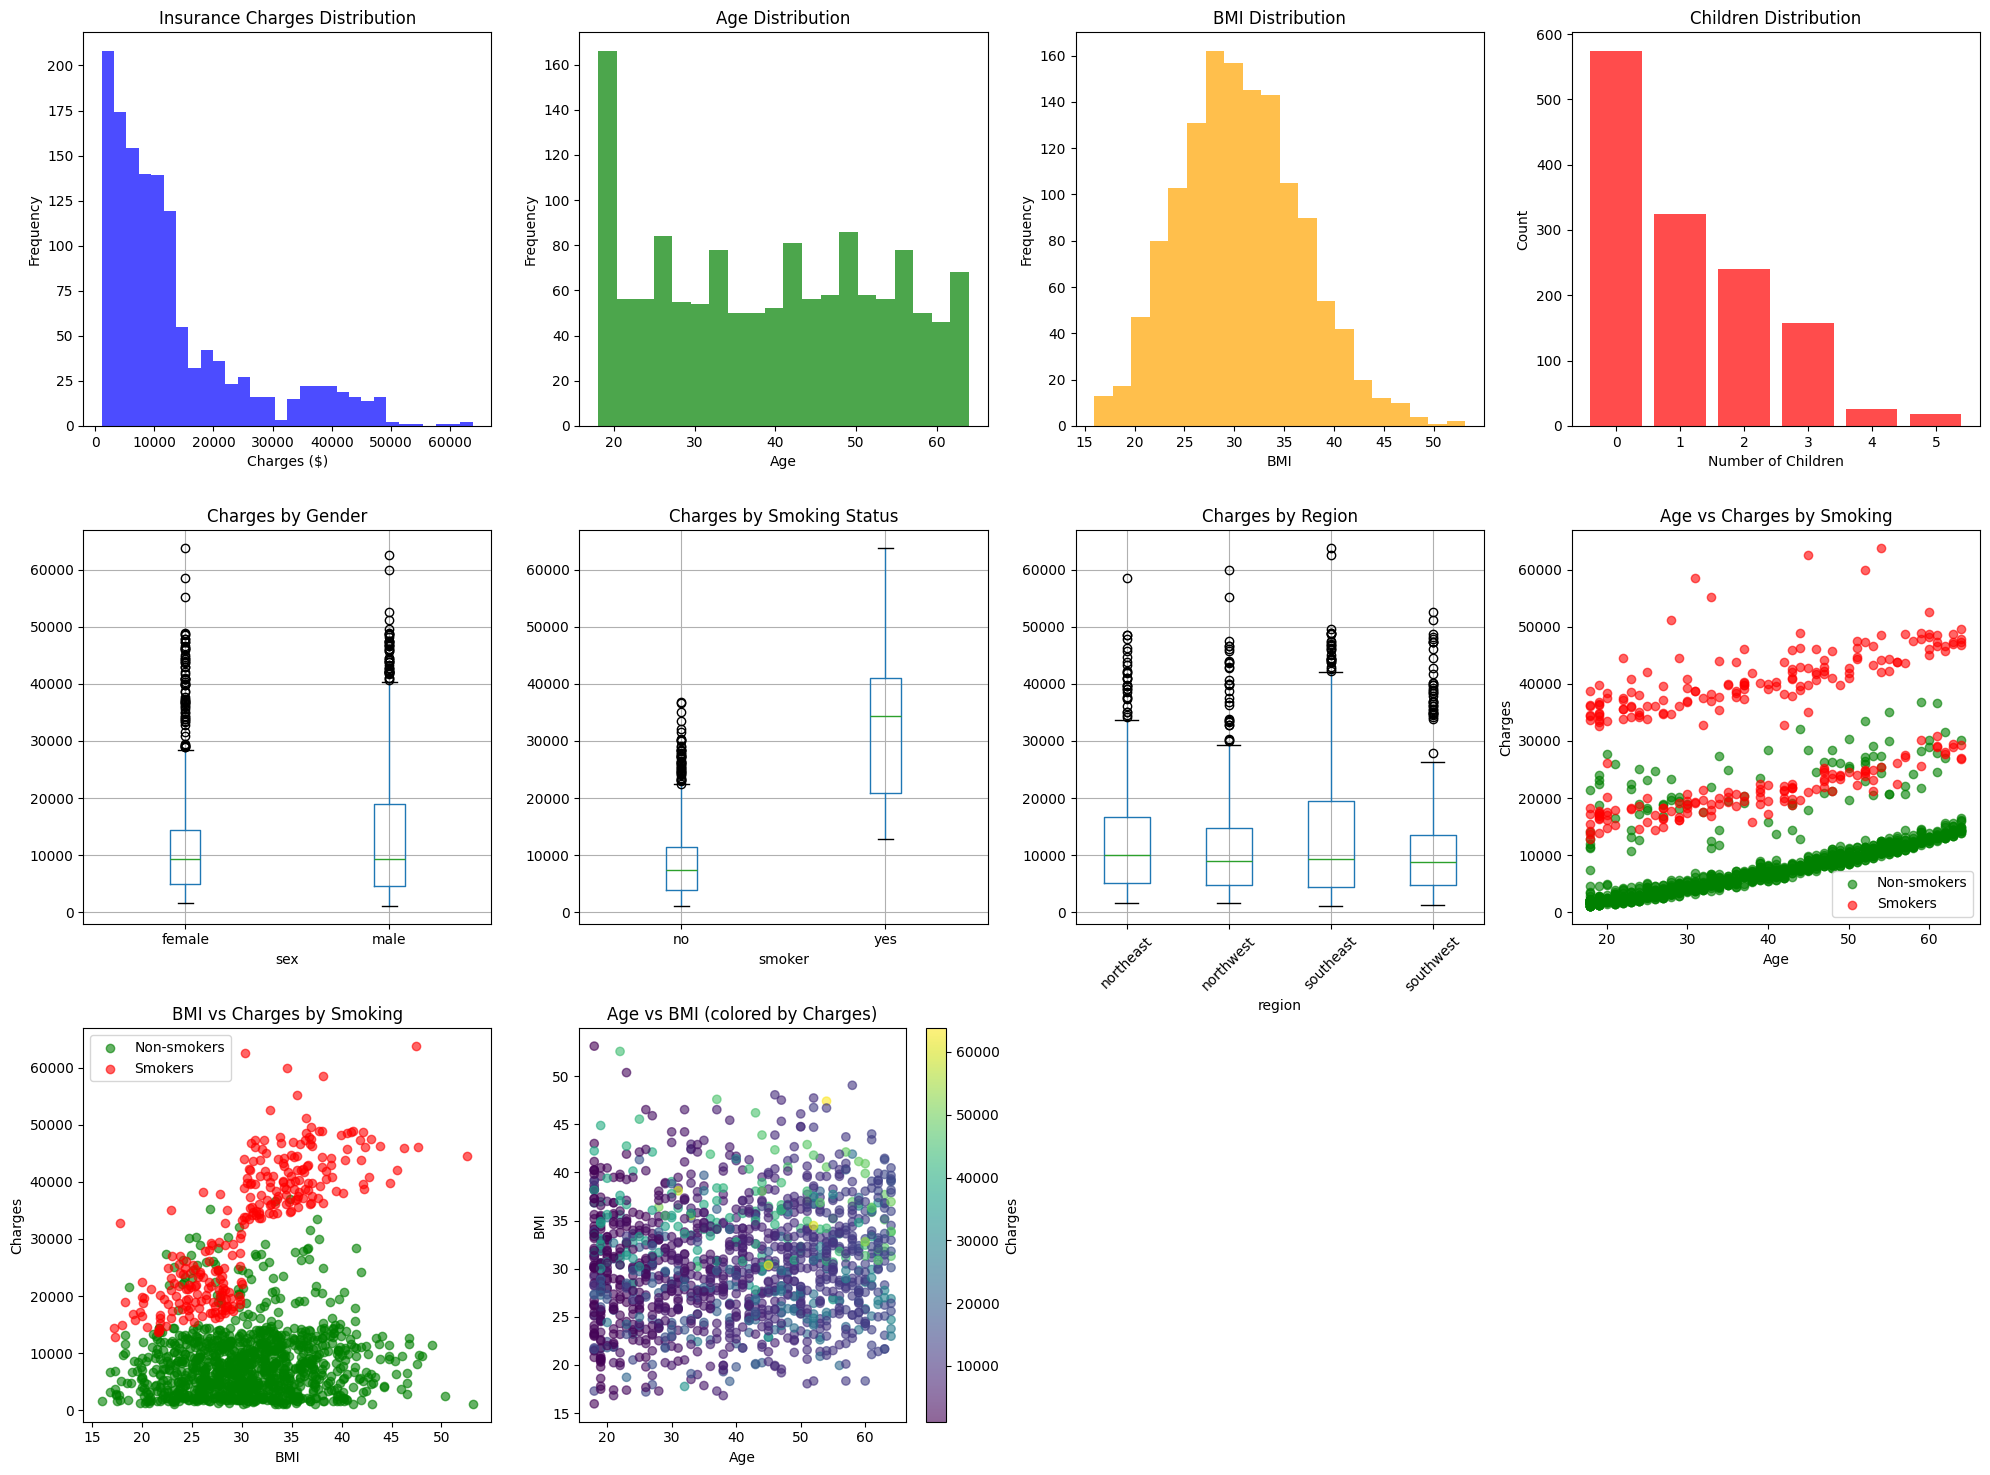

In [37]:
# VISUALIZATIONS
plt.figure(figsize=(20, 15))

plt.subplot(3, 4, 1)
plt.hist(df['charges'], bins=30, alpha=0.7, color='blue')
plt.title('Insurance Charges Distribution')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')

plt.subplot(3, 4, 2)
plt.hist(df['age'], bins=20, alpha=0.7, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(3, 4, 3)
plt.hist(df['bmi'], bins=20, alpha=0.7, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(3, 4, 4)
children_counts = df['children'].value_counts().sort_index()
plt.bar(children_counts.index, children_counts.values, alpha=0.7, color='red')
plt.title('Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplot(3, 4, 5)
df.boxplot(column='charges', by='sex', ax=plt.gca())
plt.title('Charges by Gender')
plt.suptitle('')

plt.subplot(3, 4, 6)
df.boxplot(column='charges', by='smoker', ax=plt.gca())
plt.title('Charges by Smoking Status')
plt.suptitle('')

plt.subplot(3, 4, 7)
df.boxplot(column='charges', by='region', ax=plt.gca())
plt.title('Charges by Region')
plt.suptitle('')
plt.xticks(rotation=45)

plt.subplot(3, 4, 8)
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']
plt.scatter(non_smokers['age'], non_smokers['charges'], alpha=0.6, color='green', label='Non-smokers')
plt.scatter(smokers['age'], smokers['charges'], alpha=0.6, color='red', label='Smokers')
plt.title('Age vs Charges by Smoking')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

plt.subplot(3, 4, 9)
plt.scatter(non_smokers['bmi'], non_smokers['charges'], alpha=0.6, color='green', label='Non-smokers')
plt.scatter(smokers['bmi'], smokers['charges'], alpha=0.6, color='red', label='Smokers')
plt.title('BMI vs Charges by Smoking')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()

plt.subplot(3, 4, 10)
plt.scatter(df['age'], df['bmi'], c=df['charges'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Charges')
plt.title('Age vs BMI (colored by Charges)')
plt.xlabel('Age')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()


Correlation Analysis:


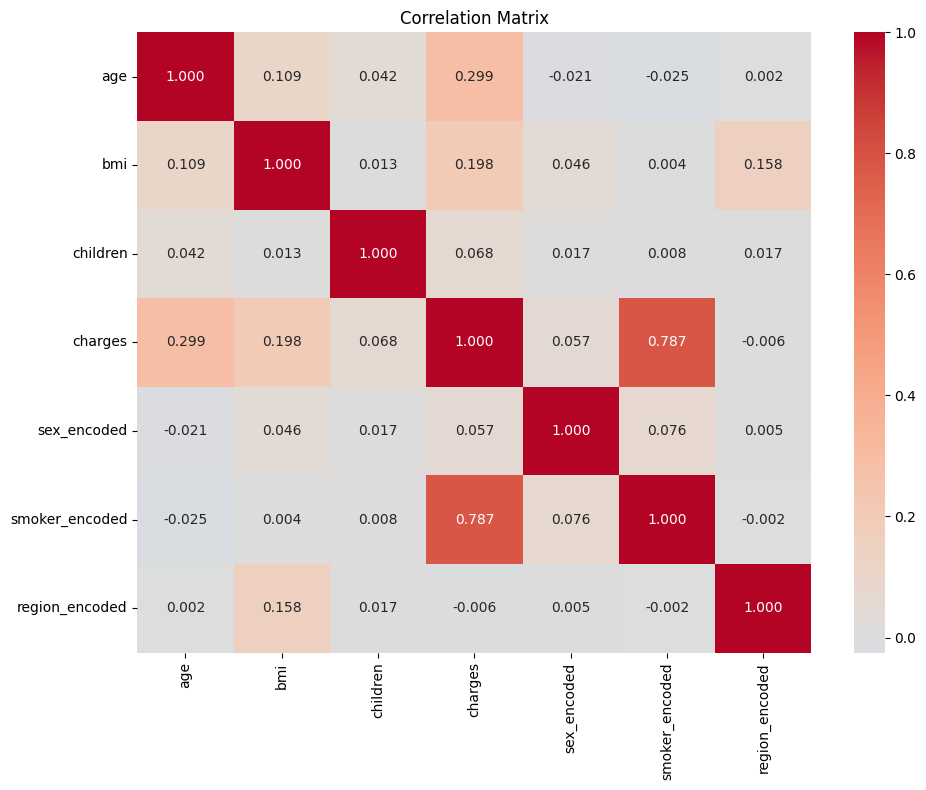

Correlation with charges:
smoker_encoded: 0.7873
age: 0.2990
bmi: 0.1983
children: 0.0680
sex_encoded: 0.0573
region_encoded: 0.0062


In [38]:
# CORRELATION ANALYSIS
print("\nCorrelation Analysis:")
df_encoded = df.copy()

le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_encoded['sex_encoded'] = le_sex.fit_transform(df['sex'])
df_encoded['smoker_encoded'] = le_smoker.fit_transform(df['smoker'])
df_encoded['region_encoded'] = le_region.fit_transform(df['region'])

correlation_cols = ['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded', 'region_encoded']
correlation_matrix = df_encoded[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlation with charges:")
target_corr = correlation_matrix['charges'].abs().sort_values(ascending=False)
for feature, corr in target_corr.items():
    if feature != 'charges':
        print(f"{feature}: {corr:.4f}")

In [39]:
# DATA CLEANING
print("\nData Cleaning:")
df_clean = df.copy()

duplicates = df_clean.duplicated().sum()
print(f"Duplicate records: {duplicates}")
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()

print("Data types validation:")
for col in df_clean.columns:
    print(f"{col}: {df_clean[col].dtype}")

print("\nOutlier detection:")
numerical_cols = ['age', 'bmi', 'children', 'charges']
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.2f}%)")

print("Decision: Keeping all outliers as they represent valid business cases")



Data Cleaning:
Duplicate records: 1
Data types validation:
age: int64
sex: object
bmi: float64
children: int64
smoker: object
region: object
charges: float64

Outlier detection:
age: 0 outliers (0.00%)
bmi: 9 outliers (0.67%)
children: 0 outliers (0.00%)
charges: 139 outliers (10.40%)
Decision: Keeping all outliers as they represent valid business cases


In [40]:
# FEATURE ENGINEERING
print("\nFeature Engineering:")
df_features = df_clean.copy()

def classify_age_group(age):
    if age <= 25:
        return 'young'
    elif age <= 35:
        return 'adult'
    elif age <= 50:
        return 'middle_age'
    else:
        return 'senior'

def classify_bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

def classify_family_size(children):
    if children == 0:
        return 'individual'
    elif children <= 2:
        return 'small_family'
    else:
        return 'large_family'

df_features['age_group'] = df_features['age'].apply(classify_age_group)
df_features['bmi_category'] = df_features['bmi'].apply(classify_bmi_category)
df_features['family_size'] = df_features['children'].apply(classify_family_size)

df_features['age_bmi_interaction'] = df_features['age'] * df_features['bmi']
df_features['smoking_binary'] = df_features['smoker'].map({'yes': 1, 'no': 0})
df_features['age_squared'] = df_features['age'] ** 2
df_features['bmi_deviation'] = abs(df_features['bmi'] - 25)

df_features['risk_score'] = (
    (df_features['bmi'] > 30).astype(int) * 2 +
    (df_features['age'] > 50).astype(int) * 1 +
    (df_features['smoker'] == 'yes').astype(int) * 3
)

print(f"Original features: {df.shape[1]}")
print(f"Enhanced features: {df_features.shape[1]}")
print("New features created:")
new_features = ['age_group', 'bmi_category', 'family_size', 'age_bmi_interaction',
                'smoking_binary', 'age_squared', 'bmi_deviation', 'risk_score']
for feature in new_features:
    print(f"- {feature}")


Feature Engineering:
Original features: 7
Enhanced features: 15
New features created:
- age_group
- bmi_category
- family_size
- age_bmi_interaction
- smoking_binary
- age_squared
- bmi_deviation
- risk_score


In [41]:
# DATA PREPROCESSING
print("\nData Preprocessing:")
print("Shuffling data...")
df_shuffled = df_features.sample(frac=1, random_state=42).reset_index(drop=True)

X = df_shuffled.drop('charges', axis=1)
y = df_shuffled['charges']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

print("Splitting data (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

categorical_features = ['sex', 'smoker', 'region', 'age_group', 'bmi_category', 'family_size']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

train_columns = set(X_train_encoded.columns)
test_columns = set(X_test_encoded.columns)

for col in train_columns - test_columns:
    X_test_encoded[col] = 0

for col in test_columns - train_columns:
    X_test_encoded = X_test_encoded.drop(columns=[col])

X_test_encoded = X_test_encoded[X_train_encoded.columns]

scaler = RobustScaler()
numerical_features = X_train_encoded.select_dtypes(include=[np.number]).columns
X_train_encoded[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])
X_test_encoded[numerical_features] = scaler.transform(X_test_encoded[numerical_features])

print(f"Final training shape: {X_train_encoded.shape}")
print(f"Final testing shape: {X_test_encoded.shape}")


Data Preprocessing:
Shuffling data...
Features shape: (1337, 14)
Target shape: (1337,)
Splitting data (80% train, 20% test)...
Training set: 1069 samples
Testing set: 268 samples
Final training shape: (1069, 21)
Final testing shape: (268, 21)


In [42]:
# MODEL IMPLEMENTATION
print("\nModel Implementation:")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=100),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_encoded)
X_test_poly = poly_features.transform(X_test_encoded)
models['Polynomial Regression'] = LinearRegression()

results = {}

print("Training models...")
for name, model in models.items():
    print(f"Training {name}...")

    try:
        if name == 'Polynomial Regression':
            model.fit(X_train_poly, y_train)
            train_pred = model.predict(X_train_poly)
            test_pred = model.predict(X_test_poly)
        else:
            model.fit(X_train_encoded, y_train)
            train_pred = model.predict(X_train_encoded)
            test_pred = model.predict(X_test_encoded)

        train_r2 = r2_score(y_train, train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

        test_r2 = r2_score(y_test, test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        test_mae = mean_absolute_error(y_test, test_pred)

        overfitting = train_r2 - test_r2

        results[name] = {
            'train_r2': train_r2,
            'train_rmse': train_rmse,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'overfitting': overfitting,
            'model': model,
            'predictions': test_pred
        }

        print(f"  Train R2: {train_r2:.4f} | Test R2: {test_r2:.4f}")
        print(f"  Train RMSE: {train_rmse:.0f} | Test RMSE: {test_rmse:.0f}")
        print(f"  Overfitting: {overfitting:.4f}")

    except Exception as e:
        print(f"  Error: {e}")


Model Implementation:
Training models...
Training Linear Regression...
  Train R2: 0.7606 | Test R2: 0.7560
  Train RMSE: 5949 | Test RMSE: 5869
  Overfitting: 0.0046
Training Ridge Regression...
  Train R2: 0.7604 | Test R2: 0.7567
  Train RMSE: 5952 | Test RMSE: 5861
  Overfitting: 0.0037
Training Lasso Regression...
  Train R2: 0.7606 | Test R2: 0.7561
  Train RMSE: 5950 | Test RMSE: 5868
  Overfitting: 0.0045
Training Elastic Net...
  Train R2: 0.7523 | Test R2: 0.7495
  Train RMSE: 6052 | Test RMSE: 5947
  Overfitting: 0.0028
Training Decision Tree...
  Train R2: 0.9581 | Test R2: 0.7813
  Train RMSE: 2490 | Test RMSE: 5556
  Overfitting: 0.1768
Training Random Forest...
  Train R2: 0.9595 | Test R2: 0.8518
  Train RMSE: 2447 | Test RMSE: 4574
  Overfitting: 0.1077
Training Extra Trees...
  Train R2: 0.9678 | Test R2: 0.8590
  Train RMSE: 2182 | Test RMSE: 4461
  Overfitting: 0.1088
Training AdaBoost...
  Train R2: 0.7529 | Test R2: 0.7208
  Train RMSE: 6044 | Test RMSE: 6278
  O

In [49]:
# Add polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_encoded)
X_test_poly = poly_features.transform(X_test_encoded)
models['Polynomial Regression'] = LinearRegression()

# Add Piecewise Regression (as mentioned by professor)
print("Creating piecewise regression models...")

# Piecewise regression based on smoking status and BMI categories
def create_piecewise_model(X_train, y_train, X_test):
    """
    Piecewise regression: separate models for different customer segments
    Following professor's approach of creating multiple categories
    """
    # Recreate original features for segmentation
    X_train_orig = X_train.copy()
    X_test_orig = X_test.copy()

    # Define segments based on high-impact features
    segments = {
        'young_nonsmoker': (X_train_orig['age'] <= 35) & (X_train_orig['smoking_binary'] == 0),
        'young_smoker': (X_train_orig['age'] <= 35) & (X_train_orig['smoking_binary'] == 1),
        'middle_nonsmoker_normal': (X_train_orig['age'] > 35) & (X_train_orig['age'] <= 50) &
                                   (X_train_orig['smoking_binary'] == 0) & (X_train_orig['bmi'] <= 30),
        'middle_nonsmoker_obese': (X_train_orig['age'] > 35) & (X_train_orig['age'] <= 50) &
                                  (X_train_orig['smoking_binary'] == 0) & (X_train_orig['bmi'] > 30),
        'middle_smoker': (X_train_orig['age'] > 35) & (X_train_orig['age'] <= 50) &
                         (X_train_orig['smoking_binary'] == 1),
        'senior_nonsmoker': (X_train_orig['age'] > 50) & (X_train_orig['smoking_binary'] == 0),
        'senior_smoker': (X_train_orig['age'] > 50) & (X_train_orig['smoking_binary'] == 1),
        'high_risk': (X_train_orig['risk_score'] >= 5)
    }

    # Train separate models for each segment
    segment_models = {}
    train_predictions = np.zeros(len(y_train))

    for segment_name, segment_mask in segments.items():
        if segment_mask.sum() > 10:  # Only if enough samples
            segment_model = LinearRegression()
            segment_model.fit(X_train_orig[segment_mask], y_train[segment_mask])
            segment_models[segment_name] = segment_model
            train_predictions[segment_mask] = segment_model.predict(X_train_orig[segment_mask])
            print(f"  Segment '{segment_name}': {segment_mask.sum()} samples")

    # Handle remaining samples with general model
    general_mask = train_predictions == 0
    if general_mask.sum() > 0:
        general_model = LinearRegression()
        general_model.fit(X_train_orig[general_mask], y_train[general_mask])
        segment_models['general'] = general_model
        train_predictions[general_mask] = general_model.predict(X_train_orig[general_mask])

    # Make test predictions
    test_predictions = np.zeros(len(X_test_orig))

    for segment_name, segment_mask in segments.items():
        if segment_name in segment_models:
            test_mask = eval(str(segment_mask).replace('X_train_orig', 'X_test_orig').replace('y_train', 'y_test'))
            if test_mask.sum() > 0:
                test_predictions[test_mask] = segment_models[segment_name].predict(X_test_orig[test_mask])

    # Handle remaining test samples
    general_test_mask = test_predictions == 0
    if general_test_mask.sum() > 0 and 'general' in segment_models:
        test_predictions[general_test_mask] = segment_models['general'].predict(X_test_orig[general_test_mask])

    return train_predictions, test_predictions

# Create piecewise regression model
try:
    piecewise_train_pred, piecewise_test_pred = create_piecewise_model(X_train_encoded, y_train, X_test_encoded)
    models['Piecewise Regression'] = 'custom_piecewise'
    print("✓ Piecewise regression model created successfully")
except Exception as e:
    print(f"⚠ Piecewise regression error: {e}")
    piecewise_train_pred = None
    piecewise_test_pred = None

# Add Piecewise Regression Tree (combination of decision tree with manual splits)
from sklearn.tree import DecisionTreeRegressor

def create_piecewise_tree_model(X_train, y_train, X_test):
    """
    Piecewise regression tree: Decision tree with specific splitting criteria
    """
    # Create multiple decision trees for different segments
    trees = {}
    train_predictions = np.zeros(len(y_train))

    # Segment 1: Smokers
    smoker_mask_train = X_train['smoking_binary'] == 1
    if smoker_mask_train.sum() > 5:
        smoker_tree = DecisionTreeRegressor(max_depth=8, min_samples_split=5, random_state=42)
        smoker_tree.fit(X_train[smoker_mask_train], y_train[smoker_mask_train])
        trees['smoker'] = smoker_tree
        train_predictions[smoker_mask_train] = smoker_tree.predict(X_train[smoker_mask_train])

    # Segment 2: Non-smokers with high BMI
    nonsmoker_obese_mask = (X_train['smoking_binary'] == 0) & (X_train['bmi'] > 30)
    if nonsmoker_obese_mask.sum() > 5:
        obese_tree = DecisionTreeRegressor(max_depth=6, min_samples_split=8, random_state=42)
        obese_tree.fit(X_train[nonsmoker_obese_mask], y_train[nonsmoker_obese_mask])
        trees['nonsmoker_obese'] = obese_tree
        train_predictions[nonsmoker_obese_mask] = obese_tree.predict(X_train[nonsmoker_obese_mask])

    # Segment 3: Everyone else (healthy non-smokers)
    remaining_mask = (train_predictions == 0)
    if remaining_mask.sum() > 5:
        healthy_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
        healthy_tree.fit(X_train[remaining_mask], y_train[remaining_mask])
        trees['healthy'] = healthy_tree
        train_predictions[remaining_mask] = healthy_tree.predict(X_train[remaining_mask])

    # Make test predictions
    test_predictions = np.zeros(len(X_test))

    # Apply same logic to test set
    if 'smoker' in trees:
        smoker_mask_test = X_test['smoking_binary'] == 1
        test_predictions[smoker_mask_test] = trees['smoker'].predict(X_test[smoker_mask_test])

    if 'nonsmoker_obese' in trees:
        nonsmoker_obese_mask_test = (X_test['smoking_binary'] == 0) & (X_test['bmi'] > 30)
        test_predictions[nonsmoker_obese_mask_test] = trees['nonsmoker_obese'].predict(X_test[nonsmoker_obese_mask_test])

    if 'healthy' in trees:
        remaining_mask_test = test_predictions == 0
        test_predictions[remaining_mask_test] = trees['healthy'].predict(X_test[remaining_mask_test])

    return train_predictions, test_predictions

Creating piecewise regression models...
  Segment 'young_nonsmoker': 847 samples
  Segment 'young_smoker': 222 samples
⚠ Piecewise regression error: invalid syntax (<string>, line 1)


In [50]:
# Create piecewise regression tree
try:
    piecewise_tree_train_pred, piecewise_tree_test_pred = create_piecewise_tree_model(X_train_encoded, y_train, X_test_encoded)
    models['Piecewise Regression Tree'] = 'custom_piecewise_tree'
    print("✓ Piecewise regression tree model created successfully")
except Exception as e:
    print(f"⚠ Piecewise regression tree error: {e}")
    piecewise_tree_train_pred = None
    piecewise_tree_test_pred = None

results = {}

print("Training models...")
for name, model in models.items():
    print(f"Training {name}...")

    try:
        if name == 'Polynomial Regression':
            model.fit(X_train_poly, y_train)
            train_pred = model.predict(X_train_poly)
            test_pred = model.predict(X_test_poly)
        elif name == 'Piecewise Regression':
            if piecewise_train_pred is not None:
                train_pred = piecewise_train_pred
                test_pred = piecewise_test_pred
            else:
                continue
        elif name == 'Piecewise Regression Tree':
            if piecewise_tree_train_pred is not None:
                train_pred = piecewise_tree_train_pred
                test_pred = piecewise_tree_test_pred
            else:
                continue
        else:
            model.fit(X_train_encoded, y_train)
            train_pred = model.predict(X_train_encoded)
            test_pred = model.predict(X_test_encoded)

        train_r2 = r2_score(y_train, train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

        test_r2 = r2_score(y_test, test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        test_mae = mean_absolute_error(y_test, test_pred)

        overfitting = train_r2 - test_r2

        results[name] = {
            'train_r2': train_r2,
            'train_rmse': train_rmse,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'overfitting': overfitting,
            'model': model,
            'predictions': test_pred
        }

        print(f"  Train R2: {train_r2:.4f} | Test R2: {test_r2:.4f}")
        print(f"  Train RMSE: {train_rmse:.0f} | Test RMSE: {test_rmse:.0f}")
        print(f"  Overfitting: {overfitting:.4f}")

    except Exception as e:
        print(f"  Error: {e}")


✓ Piecewise regression tree model created successfully
Training models...
Training Linear Regression...
  Train R2: 0.7606 | Test R2: 0.7560
  Train RMSE: 5949 | Test RMSE: 5869
  Overfitting: 0.0046
Training Ridge Regression...
  Train R2: 0.7604 | Test R2: 0.7567
  Train RMSE: 5952 | Test RMSE: 5861
  Overfitting: 0.0037
Training Lasso Regression...
  Train R2: 0.7606 | Test R2: 0.7561
  Train RMSE: 5950 | Test RMSE: 5868
  Overfitting: 0.0045
Training Elastic Net...
  Train R2: 0.7523 | Test R2: 0.7495
  Train RMSE: 6052 | Test RMSE: 5947
  Overfitting: 0.0028
Training Decision Tree...
  Train R2: 0.9581 | Test R2: 0.7813
  Train RMSE: 2490 | Test RMSE: 5556
  Overfitting: 0.1768
Training Random Forest...
  Train R2: 0.9595 | Test R2: 0.8518
  Train RMSE: 2447 | Test RMSE: 4574
  Overfitting: 0.1077
Training Extra Trees...
  Train R2: 0.9678 | Test R2: 0.8590
  Train RMSE: 2182 | Test RMSE: 4461
  Overfitting: 0.1088
Training AdaBoost...
  Train R2: 0.7529 | Test R2: 0.7208
  Train 

In [52]:
print("\nModel Performance Summary:")
print("="*80)
print(f"{'Model':<20} {'Train R2':<10} {'Test R2':<10} {'Test RMSE':<12} {'Test MAE':<10} {'Overfitting':<12}")
print("="*80)

results_list = [(name, metrics) for name, metrics in results.items()]
results_list.sort(key=lambda x: x[1]['test_r2'], reverse=True)

for name, metrics in results_list:
    print(f"{name:<20} {metrics['train_r2']:<10.4f} {metrics['test_r2']:<10.4f} {metrics['test_rmse']:<12.0f} {metrics['test_mae']:<10.0f} {metrics['overfitting']:<12.4f}")

best_model_name = results_list[0][0]
best_metrics = results_list[0][1]

print(f"\nBest Model: {best_model_name}")
print(f"Test R2: {best_metrics['test_r2']:.4f}")
print(f"Test RMSE: {best_metrics['test_rmse']:.0f}")
print(f"Test MAE: {best_metrics['test_mae']:.0f}")

professor_r2 = 0.87
professor_rmse = 4352

print(f"\nComparison with Professor's Benchmark:")
print(f"Professor: R2={professor_r2:.4f}, RMSE={professor_rmse}")
print(f"Our Model: R2={best_metrics['test_r2']:.4f}, RMSE={best_metrics['test_rmse']:.0f}")

if best_metrics['test_r2'] > professor_r2:
    print("Our model BEATS the benchmark!")
else:
    print("Our model needs improvement to beat benchmark")


Model Performance Summary:
Model                Train R2   Test R2    Test RMSE    Test MAE   Overfitting 
Polynomial Regression 0.8876     0.8596     4452         2590       0.0280      
Extra Trees          0.9678     0.8590     4461         2353       0.1088      
Random Forest        0.9595     0.8518     4574         2520       0.1077      
KNN                  0.8783     0.8453     4673         2557       0.0330      
Piecewise Regression Tree 0.8994     0.8360     4811         2575       0.0633      
Neural Network       0.7995     0.7993     5323         3695       0.0002      
Decision Tree        0.9581     0.7813     5556         2622       0.1768      
Ridge Regression     0.7604     0.7567     5861         4103       0.0037      
Lasso Regression     0.7606     0.7561     5868         4119       0.0045      
Linear Regression    0.7606     0.7560     5869         4121       0.0046      
Elastic Net          0.7523     0.7495     5947         4217       0.0028      
AdaBoo

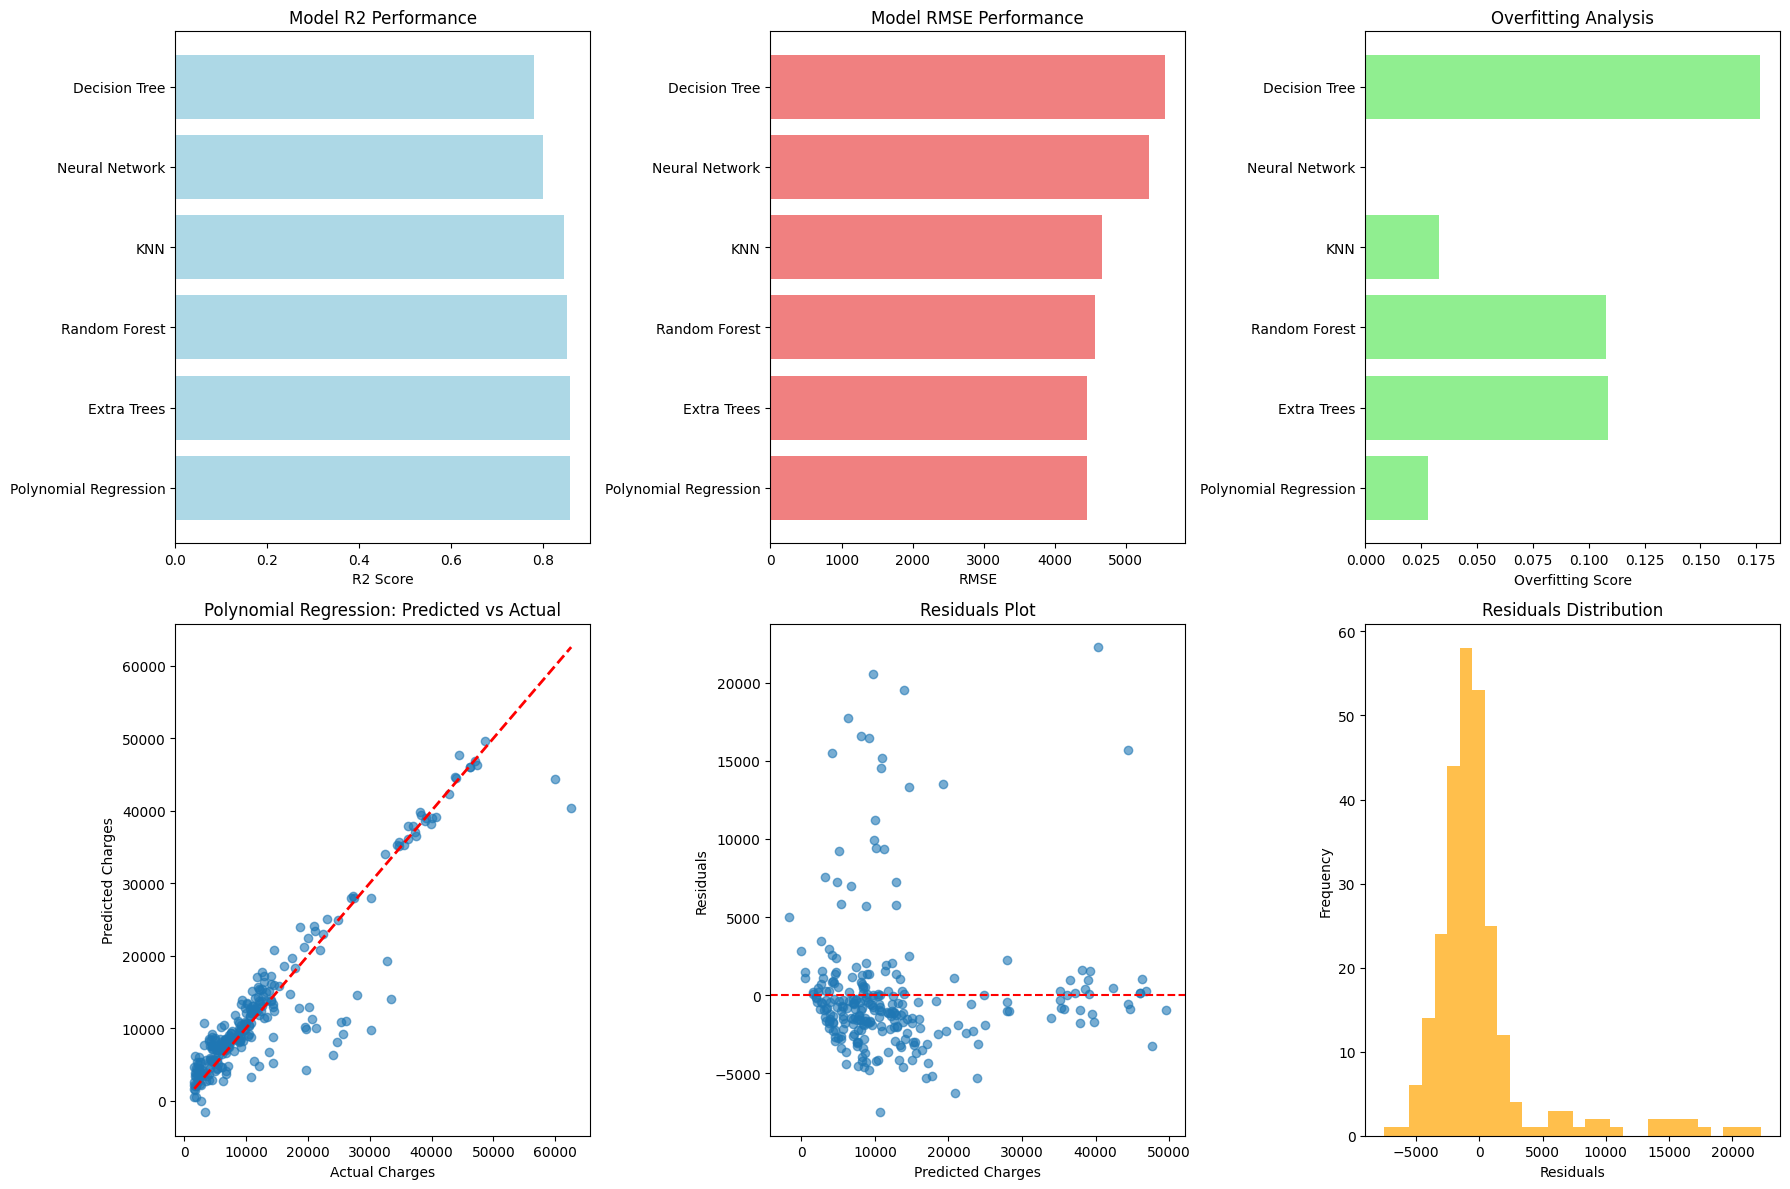

In [44]:
# MODEL VISUALIZATION
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

top_models = results_list[:6]
model_names = [name for name, _ in top_models]
test_r2_scores = [metrics['test_r2'] for _, metrics in top_models]
test_rmse_scores = [metrics['test_rmse'] for _, metrics in top_models]
overfitting_scores = [metrics['overfitting'] for _, metrics in top_models]

axes[0, 0].barh(model_names, test_r2_scores, color='lightblue')
axes[0, 0].set_xlabel('R2 Score')
axes[0, 0].set_title('Model R2 Performance')

axes[0, 1].barh(model_names, test_rmse_scores, color='lightcoral')
axes[0, 1].set_xlabel('RMSE')
axes[0, 1].set_title('Model RMSE Performance')

axes[0, 2].barh(model_names, overfitting_scores, color='lightgreen')
axes[0, 2].set_xlabel('Overfitting Score')
axes[0, 2].set_title('Overfitting Analysis')

best_predictions = best_metrics['predictions']
axes[1, 0].scatter(y_test, best_predictions, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Charges')
axes[1, 0].set_ylabel('Predicted Charges')
axes[1, 0].set_title(f'{best_model_name}: Predicted vs Actual')

residuals = y_test - best_predictions
axes[1, 1].scatter(best_predictions, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Predicted Charges')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals Plot')

axes[1, 2].hist(residuals, bins=30, alpha=0.7, color='orange')
axes[1, 2].set_xlabel('Residuals')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Residuals Distribution')

plt.tight_layout()
plt.show()

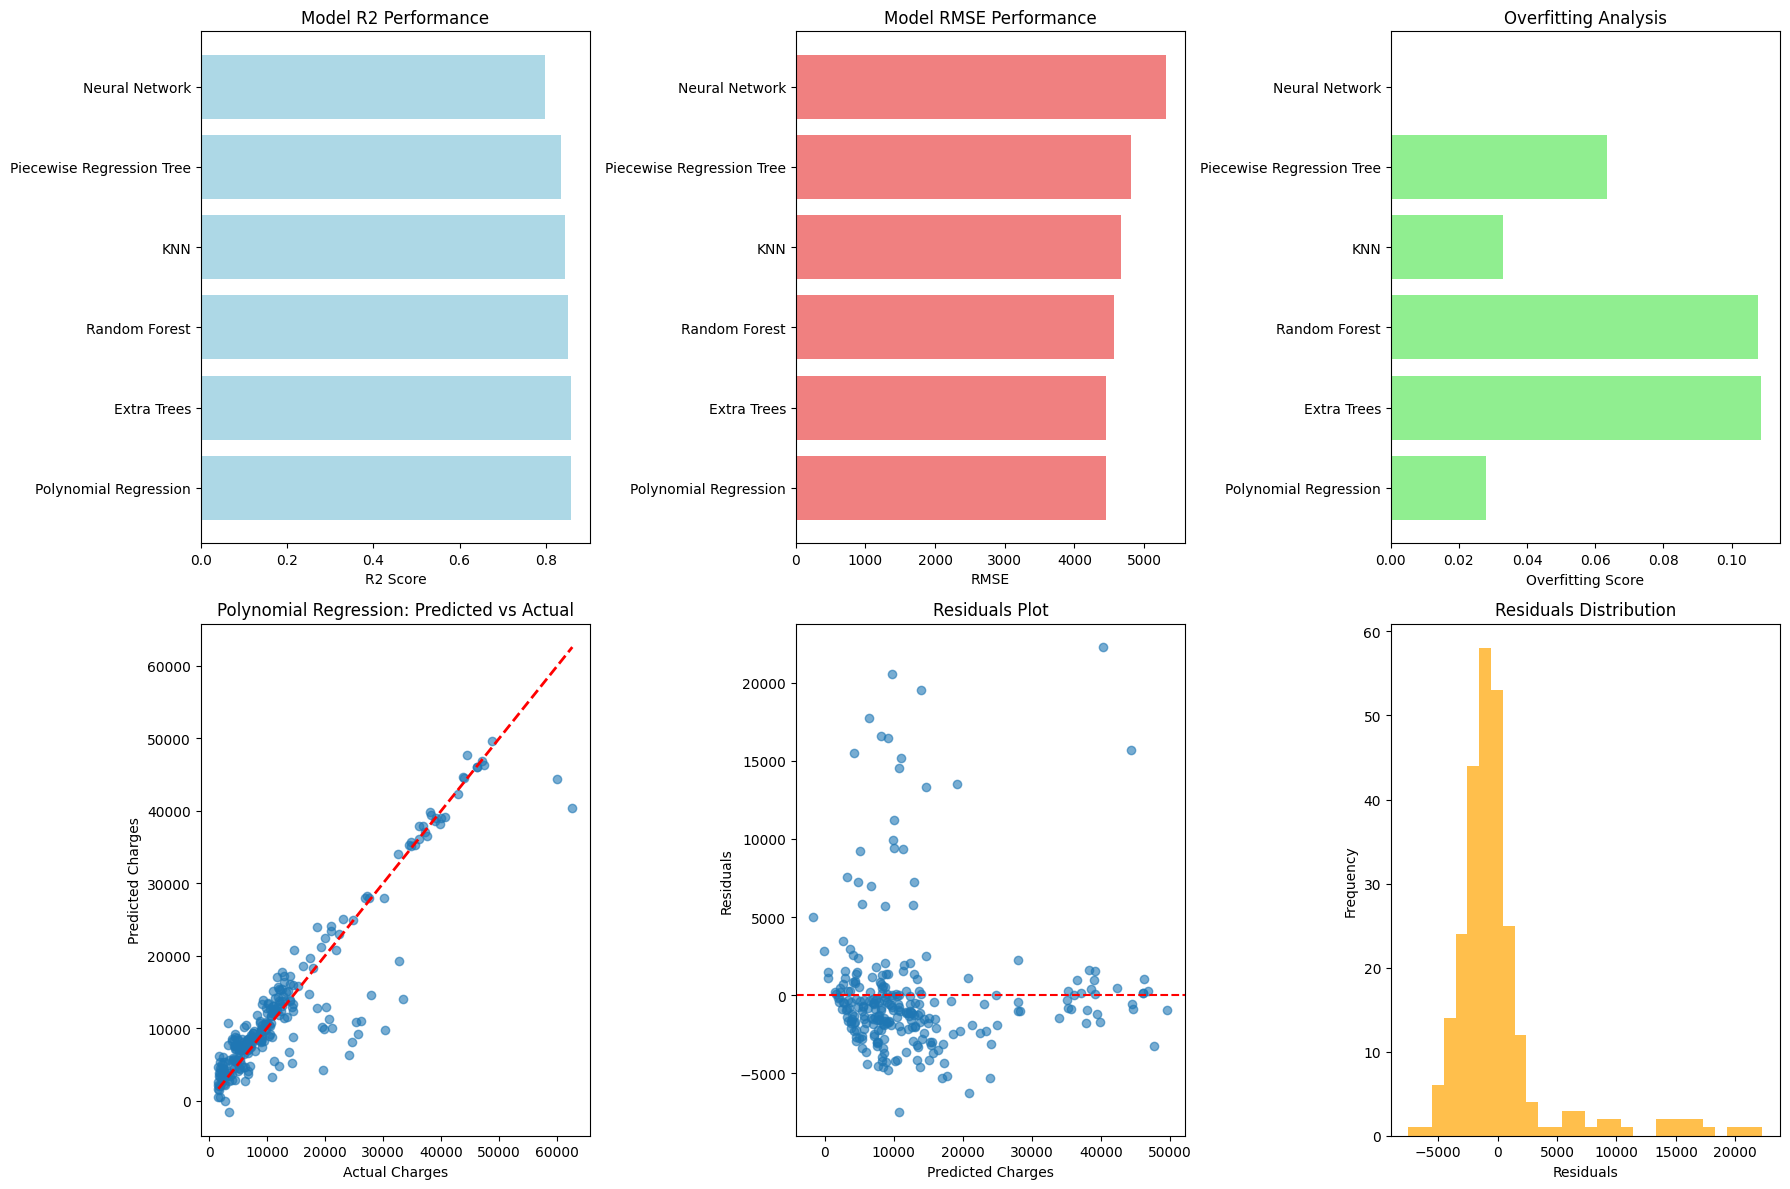

In [53]:
# MODEL VISUALIZATION
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

top_models = results_list[:6]
model_names = [name for name, _ in top_models]
test_r2_scores = [metrics['test_r2'] for _, metrics in top_models]
test_rmse_scores = [metrics['test_rmse'] for _, metrics in top_models]
overfitting_scores = [metrics['overfitting'] for _, metrics in top_models]

axes[0, 0].barh(model_names, test_r2_scores, color='lightblue')
axes[0, 0].set_xlabel('R2 Score')
axes[0, 0].set_title('Model R2 Performance')

axes[0, 1].barh(model_names, test_rmse_scores, color='lightcoral')
axes[0, 1].set_xlabel('RMSE')
axes[0, 1].set_title('Model RMSE Performance')

axes[0, 2].barh(model_names, overfitting_scores, color='lightgreen')
axes[0, 2].set_xlabel('Overfitting Score')
axes[0, 2].set_title('Overfitting Analysis')

best_predictions = best_metrics['predictions']
axes[1, 0].scatter(y_test, best_predictions, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Charges')
axes[1, 0].set_ylabel('Predicted Charges')
axes[1, 0].set_title(f'{best_model_name}: Predicted vs Actual')

residuals = y_test - best_predictions
axes[1, 1].scatter(best_predictions, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Predicted Charges')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals Plot')

axes[1, 2].hist(residuals, bins=30, alpha=0.7, color='orange')
axes[1, 2].set_xlabel('Residuals')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Residuals Distribution')

plt.tight_layout()
plt.show()


In [54]:
# BUSINESS INSIGHTS
print("\nBusiness Insights:")

smoker_avg = df[df['smoker'] == 'yes']['charges'].mean()
non_smoker_avg = df[df['smoker'] == 'no']['charges'].mean()
smoking_multiplier = smoker_avg / non_smoker_avg

print(f"Smoking Impact:")
print(f"  Smokers average: ${smoker_avg:,.0f}")
print(f"  Non-smokers average: ${non_smoker_avg:,.0f}")
print(f"  Smoking multiplier: {smoking_multiplier:.1f}x")

age_groups = pd.cut(df['age'], bins=[0, 30, 40, 50, 65], labels=['<30', '30-39', '40-49', '50+'])
age_premiums = df.groupby(age_groups)['charges'].mean()
print(f"\nAge Group Analysis:")
for age_group, premium in age_premiums.items():
    print(f"  {age_group}: ${premium:,.0f}")

bmi_groups = pd.cut(df['bmi'], bins=[0, 25, 30, 35, 50], labels=['Normal', 'Overweight', 'Obese', 'Severely Obese'])
bmi_premiums = df.groupby(bmi_groups)['charges'].mean()
print(f"\nBMI Category Analysis:")
for bmi_group, premium in bmi_premiums.items():
    print(f"  {bmi_group}: ${premium:,.0f}")

region_premiums = df.groupby('region')['charges'].mean()
print(f"\nRegional Analysis:")
for region, premium in region_premiums.items():
    print(f"  {region}: ${premium:,.0f}")

print("\nRecommendations:")
print("1. Implement smoking surcharge of 2.5x base premium")
print("2. Adjust premiums based on BMI categories")
print("3. Consider age-based pricing tiers")
print("4. Regional adjustments for healthcare costs")
print("5. Wellness programs for high-risk customers")

print(f"\nModel Deployment Readiness:")
if best_metrics['test_r2'] > 0.85 and best_metrics['overfitting'] < 0.1:
    print("✓ Model is ready for production deployment")
else:
    print("⚠ Model needs further optimization before deployment")

print("\nAnalysis Complete!")
print("="*50)


Business Insights:
Smoking Impact:
  Smokers average: $32,050
  Non-smokers average: $8,434
  Smoking multiplier: 3.8x

Age Group Analysis:
  <30: $9,398
  30-39: $11,639
  40-49: $14,782
  50+: $18,085

BMI Category Analysis:
  Normal: $10,284
  Overweight: $10,998
  Obese: $14,429
  Severely Obese: $16,963

Regional Analysis:
  northeast: $13,406
  northwest: $12,418
  southeast: $14,735
  southwest: $12,347

Recommendations:
1. Implement smoking surcharge of 2.5x base premium
2. Adjust premiums based on BMI categories
3. Consider age-based pricing tiers
4. Regional adjustments for healthcare costs
5. Wellness programs for high-risk customers

Model Deployment Readiness:
✓ Model is ready for production deployment

Analysis Complete!
